# Numerical Solution of Initial Value Problems

## First Order ODEs

First order ODEs are of the form
$$y'(x) = f(x,y), \quad y(x_0) = y_0$$
where $y(x_0)=y_0$ is the given initial value. Typically, such an ODE is solved by dividing the range $x_0$ to $x_n$ over which the solution is sought into $n$ equal intervals each of width $h$, and solving the equation at these points $x_0, x_1=x_0 + h, \ldots, x_n=x_0 + n \cdot h$ The recurrence equation is based on the Taylor Series, considering the first two terms:
$$y(x+h) = y(x) + h \cdot y'(x)$$
Since $y'(x)=f(x,y)$, above equation can be written as:
$$y(x+h) = y(x) + h \cdot f(x,y)$$
Applying this to the sequence of points above, the recurrence equation can be written as:
$$y_{i+1} = y_{i} + h \cdot f(x_i, y_i)$$
Note that the value of $y(x)$ at the current point $y_{i+1}$ requires the slope to be estimated at the previous point $x_i$ and requires the value of the function $y_i$ at the previous point. If the interval is sufficiently small, the solution is close to the exact solution.

           x        Euler        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.200000     0.000000     0.021403     0.021403
    0.400000     0.040000     0.091825     0.051825
    0.600000     0.128000     0.222119     0.094119
    0.800000     0.273600     0.425541     0.151941
    1.000000     0.488320     0.718282     0.229962


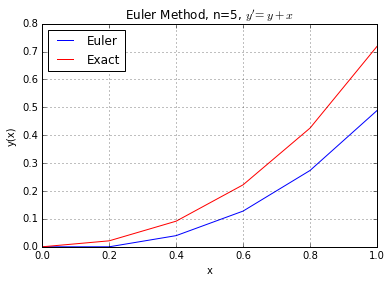

In [1]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x, y):
    return y + x

def euler(f, x0, y0, xn, n):
    h = float(xn - x0) / n
    x = np.linspace(x0, xn, n+1)
    y = np.zeros_like(x)
    for i in range(n):
        y[i+1] = y[i] + h * f(x[i], y[i])
    return x, y

x, y = euler(f, 0, 0, 1, 5)
yexact = np.exp(x) - x - 1
print('%12s %12s %12s %12s' % ('x', 'Euler', 'Exact', 'Error'))
for xx, y1, y2 in zip(x, y, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, y1, y2, y2-y1))
plt.plot(x, y, 'b-', x, yexact, 'r-')
plt.legend(['Euler', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Euler Method, n=5, $y' = y + x$")
plt.show()

           x        Euler        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.020000     0.000000     0.000201     0.000201
    0.040000     0.000400     0.000811     0.000411
    0.060000     0.001208     0.001837     0.000629
    0.080000     0.002432     0.003287     0.000855
    0.100000     0.004081     0.005171     0.001090
    0.120000     0.006162     0.007497     0.001334
    0.140000     0.008686     0.010274     0.001588
    0.160000     0.011659     0.013511     0.001851
    0.180000     0.015093     0.017217     0.002125
    0.200000     0.018994     0.021403     0.002408
    0.220000     0.023374     0.026077     0.002702
    0.240000     0.028242     0.031249     0.003007
    0.260000     0.033607     0.036930     0.003323
    0.280000     0.039479     0.043130     0.003651
    0.300000     0.045868     0.049859     0.003990
    0.320000     0.052786     0.057128     0.004342
    0.340000     0.060241     0.064948     0.004706
    0.360000

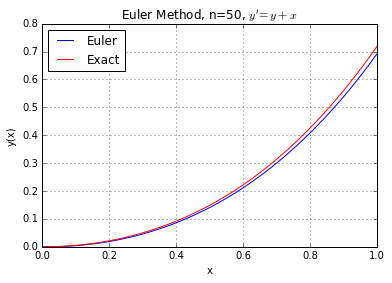

In [2]:
n = 50
x, y = euler(f, 0, 0, 1, n)
yexact = np.exp(x) - x - 1
print('%12s %12s %12s %12s' % ('x', 'Euler', 'Exact', 'Error'))
for xx, y1, y2 in zip(x, y, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, y1, y2, y2-y1))
plt.plot(x, y, 'b-', x, yexact, 'r-')
plt.legend(['Euler', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Euler Method, n=%d, $y' = y + x$" % (n))
plt.show()

## Heun's Method (Improved Euler method)
Heun's method estimates the slope as the average of the slopes at $x_i$ and $x_{i+1}$. Using $x_i$ and $y_i$, we estimate slope at $x_i$, namely $f(x_i, y_i)$ and using that, we estimate $y_{i+1}$. Knowing $y_{i+1}$, we can now estimate slope at $x_{i+1}$, namely, $f(x_{i+1}, y_{i+1})$. The slope is approximated as $\frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1}))}{2}$.

Slope at left = $f(x_i, y_i)$

Ordinate at right = $y_i + h \, f(x_i, y_i)$

Slope at right = $f(x_i + h, y_i + h \, f(x_i, y_i))$

Ideal slope = $\frac{1}{2} \left( f(x_i, y_i) + f(x_i + h, y_i + h \, f(x_i, y_i)) \right)$

$\Delta y = h \, \frac{1}{2} \left( f(x_i, y_i) + f(x_i + h, y_i + h \, f(x_i, y_i)) \right)$

$x_{i+1} = x_i + h$

$y_{i+1} = y_i + h \, \frac{1}{2} \left( f(x_i, y_i) + f(x_i + h, y_i + h \, f(x_i, y_i)) \right)$

**Reference:** [Wikipedia article on Heun's Method](https://en.wikipedia.org/wiki/Heun's_method)

           x         Heun        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.050000     0.000000     0.005171     0.005171
    0.100000     0.002500     0.021403     0.018903
    0.150000     0.007625     0.049859     0.042234
    0.200000     0.015506     0.091825     0.076318
    0.250000     0.026282     0.148721     0.122440
    0.300000     0.040096     0.222119     0.182023
    0.350000     0.057100     0.313753     0.256652
    0.400000     0.077455     0.425541     0.348085
    0.450000     0.101328     0.559603     0.458275
    0.500000     0.128895     0.718282     0.589387
    0.550000     0.160339     0.904166     0.743827
    0.600000     0.195856     1.120117     0.924261
    0.650000     0.235649     1.369297     1.133648
    0.700000     0.279932     1.655200     1.375268
    0.750000     0.328928     1.981689     1.652761
    0.800000     0.382875     2.353032     1.970158
    0.850000     0.442018     2.773947     2.331929
    0.900000

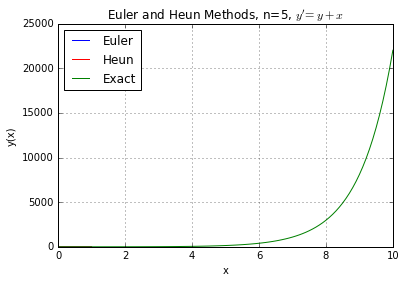

           x         Heun        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.050000     0.001250     0.005171     0.003921
    0.100000     0.005127     0.021403     0.016276
    0.150000     0.011764     0.049859     0.038095
    0.200000     0.021305     0.091825     0.070520
    0.250000     0.033897     0.148721     0.114825
    0.300000     0.049696     0.222119     0.172423
    0.350000     0.068868     0.313753     0.244884
    0.400000     0.091585     0.425541     0.333956
    0.450000     0.118029     0.559603     0.441574
    0.500000     0.148390     0.718282     0.569891
    0.550000     0.182870     0.904166     0.721296
    0.600000     0.221680     1.120117     0.898437
    0.650000     0.265041     1.369297     1.104255
    0.700000     0.313187     1.655200     1.342013
    0.750000     0.366363     1.981689     1.615326
    0.800000     0.424826     2.353032     1.928206
    0.850000     0.488849     2.773947     2.285099
    0.900000

In [18]:
def heun(f, x0, y0, xn, n, debug=False):
    h = float(xn - x0) / n
    x = np.linspace(x0, xn, n+1)
    y = np.zeros((n+1,), dtype=float)
    y[0] = y0
    for i in range(n):
        f1 = f(x[i], y[i])  # slope at x[i]
        y1 = y[i] + h * f1  # y[i+1]
        f2 = f(x[i+1], y1)  # slope at x[i+1]
        y[i+1] = y[i] + h * (f1 + f2) / 2.0
        if debug:
            print('%4d %12.6f %12.6f %12.6f %12.6f %12.6f' % (i, x[i+1], f1, y1, f2, y[i+1]))
    return x, y

n = 20
x1, y1 = euler(f, 0, 0, 1, n)
x2, y2 = heun(f, 0, 0, 1, n)
yexact = np.exp(x) - x - 1
print('%12s %12s %12s %12s' % ('x', 'Heun', 'Exact', 'Error'))
for xx, yy1, yy2 in zip(x1, y1, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, yy1, yy2, yy2-yy1))
plt.plot(x1, y1, 'b-', x2, y2, 'r-', x, yexact, 'g-')
plt.legend(['Euler', 'Heun', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Euler and Heun Methods, n=5, $y' = y + x$")
plt.show()

def heun2(f, x0, y0, xn, h):
    x = np.arange(x0, xn+h, h)
    y = np.zeros_like(x)
    y[0] = y0
    n = len(x)
    for i in range(1, n):
        k0 = h * f(x[i-1], y[i-1])
        k1 = h * f(x[i-1]+h/2.0, y[i-1]+k0/2.0)
        y[i] = y[i-1] + k1
    return x, y

x3, y3 = heun2(f, 0.0, 0.0, 1.0, 0.05)
print('%12s %12s %12s %12s' % ('x', 'Heun', 'Exact', 'Error'))
for xx, yy1, yy2 in zip(x3, y3, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, yy1, yy2, yy2-yy1))

           x         Heun        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.050000     0.001250     0.001271     0.000021
    0.100000     0.005127     0.005171     0.000044
    0.150000     0.011764     0.011834     0.000070
    0.200000     0.021305     0.021403     0.000098
    0.250000     0.033897     0.034025     0.000129
    0.300000     0.049696     0.049859     0.000163
    0.350000     0.068868     0.069068     0.000199
    0.400000     0.091585     0.091825     0.000239
    0.450000     0.118029     0.118312     0.000283
    0.500000     0.148390     0.148721     0.000331
    0.550000     0.182870     0.183253     0.000383
    0.600000     0.221680     0.222119     0.000439
    0.650000     0.265041     0.265541     0.000500
    0.700000     0.313187     0.313753     0.000566
    0.750000     0.366363     0.367000     0.000637
    0.800000     0.424826     0.425541     0.000714
    0.850000     0.488849     0.489647     0.000798
    0.900000

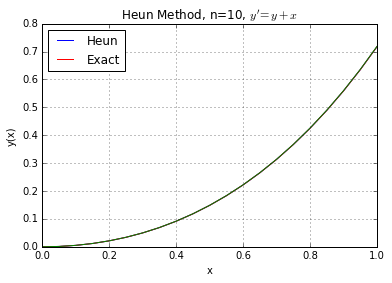

In [4]:
n = 20
x2, y2 = heun(f, 0, 0, 1, n)
yexact = np.exp(x2) - x2 - 1
print('%12s %12s %12s %12s' % ('x', 'Heun', 'Exact', 'Error'))
for xx, yy1, yy2 in zip(x2, y2, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, yy1, yy2, yy2-yy1))
plt.plot(x2, y2, 'b-', x2, y2, 'r-', x2, yexact, 'g-')
plt.legend(['Heun', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = y + x$")
plt.show()

           x         Heun
    0.000000     1.000000
    0.100000     1.005000
    0.200000     1.020354
    0.300000     1.047026
    0.400000     1.086795
    0.500000     1.142568
    0.600000     1.218971
    0.700000     1.323440
    0.800000     1.468384
    0.900000     1.675791
    1.000000     1.988126


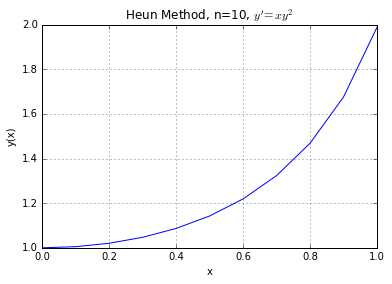

In [5]:
def fx(x, y):
    return x*y**2

x, y = heun(fx, 0, 1, 1, 10)
print('%12s %12s' % ('x', 'Heun'))
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = x y^2$")
plt.show()

           x         Heun
    0.000000     0.000000
    0.100000     0.000500
    0.200000     0.003035
    0.300000     0.009814
    0.400000     0.023408
    0.500000     0.047024
    0.600000     0.084899
    0.700000     0.142949
    0.800000     0.229887
    0.900000     0.359299
    1.000000     0.553790


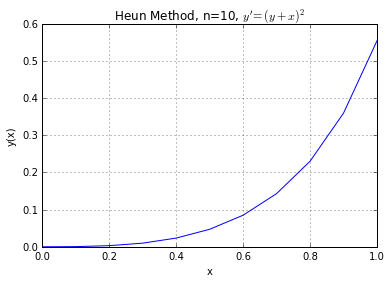

In [6]:
def f3(x, y):
    return (y + x)**2

x, y = heun(f3, 0, 0, 1, 10)
print('%12s %12s' % ('x', 'Heun'))
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = (y + x)^2$")
plt.show()

Solve the following first-order ODE over the range $x = 0$ to $x=4$ with the initial value $y_0 = 1.0$ by dividing the interval into 8, 40 and 80 equal intervals. Use Euler method .
$$y' = \frac{dy}{dx} = -2x^3 + 12 x^2 - 20x + 8.5$$

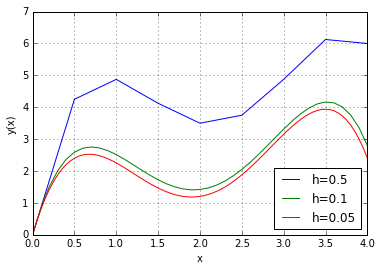

In [7]:
def f2(x, y):
    return -2*x**3 + 12 * x**2 -20*x + 8.5

x0 = 0.0
y0 = 1.0
xn = 4.0

x1, y1 = euler(f2, x0, y0, xn, 8)
x2, y2 = euler(f2, x0, y0, xn, 40)
x3, y3 = euler(f2, x0, y0, xn, 80)

plt.plot(x1, y1, x2, y2, x3, y3)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(['h=0.5', 'h=0.1', 'h=0.05'], loc=4)
plt.show()

Solve the following first order ODE using Euler method for the following values: $x_0 = 0, x_n = 1, y_0 = 1, n = 10$.
$$ \frac{dy}{dx} = x y^2$$

In [8]:
def f4(x, y):
    return x * y**2

x, y = euler(f4, 0, 1, 1, 10)

for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))

    0.000000     0.000000
    0.100000     0.000000
    0.200000     0.000000
    0.300000     0.000000
    0.400000     0.000000
    0.500000     0.000000
    0.600000     0.000000
    0.700000     0.000000
    0.800000     0.000000
    0.900000     0.000000
    1.000000     0.000000


In [9]:
def func(x, y):
    return (x + y)**2

x, y = heun(func, 0, 0, 0.5, 5, True)
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))

   0     0.100000     0.000000     0.000000     0.010000     0.000500
   1     0.200000     0.010100     0.001510     0.040606     0.003035
   2     0.300000     0.041223     0.007158     0.094346     0.009814
   3     0.400000     0.095985     0.019412     0.175907     0.023408
   4     0.500000     0.179275     0.041336     0.293044     0.047024
    0.000000     0.000000
    0.100000     0.000500
    0.200000     0.003035
    0.300000     0.009814
    0.400000     0.023408
    0.500000     0.047024


## Fourth Order Runge-Kutta Method

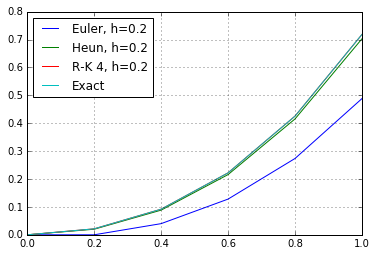

In [10]:
def rk4(f, x0, y0, xn, n):
    x = np.linspace(x0, xn, n+1)
    n = len(x)
    h = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(1, n):
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i-1]+h/2.0, y[i-1]+k1/2.0)
        k3 = h * f(x[i-1]+h/2.0, y[i-1]+k2/2.0)
        k4 = h * f(x[i-1]+h, y[i-1]+k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return x, y

x, y = euler(f, 0, 0, 1, 5)
x1, y1 = heun(f, 0, 0, 1, 5)
x2, y2 = rk4(f, 0, 0, 1, 5)

plt.plot(x, y, x1, y1, x2, y2, x, np.exp(x)-x-1)
plt.grid()
plt.legend(['Euler, h=0.2', 'Heun, h=0.2', 'R-K 4, h=0.2', 'Exact'], loc=2)
plt.show()

## Kiusalaas

$$ y' = \sin(y), \qquad y(0) = 0$$

In [11]:
def f5(x, y):
    return np.sin(y)

x0 = 0.0
y0 = 1.0
xn = 0.5
n = 5

x, y = heun(f5, x0, y0, xn, n)
for xx, yy in zip(x, y):
    print("%f %f" % (xx, yy))

0.000000 1.000000
0.100000 1.086269
0.200000 1.176643
0.300000 1.270549
0.400000 1.367268
0.500000 1.465958


## Series of ODEs

$$ y'' = -0.1 y' - x, \qquad y(0) = 0, y'(0) = 1 $$

Let $y_0 = y$ and $y_1 = y'$.The equivalent first order equations 
$$
\begin{align*}
y' &= F(x, y) = \begin{bmatrix} y'_0 \\ y'_1 \end{bmatrix} = \begin{bmatrix} y_1 \\ -0.1 y_1 - x \end{bmatrix}
\end{align*}
$$

In [12]:
def integrate(F, x0, y0, xn, h):
    def run_kut4(F, x, y, h):
        k0 = h * F(x, y)
        k1 = h * F(x + h/2.0, y + k0/2.0)
        k2 = h * F(x + h/2.0, y + k1/2.0)
        k3 = h * F(x + h, y + k2)
        return (k0 + 2*k1 + 2*k2 + k3) / 6.0

    x = []
    y = []
    x.append(x0)
    y.append(y0)
    while x <= xn:
        h = min(h, xn - x0)
        y0 = y0 + run_kut4(F, x0, y0, h)
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
    return np.array(x), np.array(y)

def F(x, y):
    f = zeros((2,), dtype=float)
    f[0] = y[1]
    f[1] = -0.1 * y[1] - x
    return f

x0 = 0.0
xn = 2.0
y = np.array([0.0, 1.0])
n = 8

### Numerical Solution of Initial Value Problems

General form of _first order differential equation_ is

$$y' = f(x, y) $$

where $y' = dy / dx$ and $f(x, y)$ is a given function. The solution of this equation contains an arbitrary constant (the constant of integration). To find this constant, we must know a point on the solution curve, that is, $y$ must be specified at some value of $x$, say at $x = a$. We write this auxiliary condition as
$$y(a) = \alpha$$

An ordinary differential equaion of order $n$
$$y^{(n)} = f(x, y, y', \ldots , y^{(n-1)} )$$
can always be transformed into $n$ first-order equations. Using the notation
$$y_0 = y \quad y_1 = y' \quad y_2 = y'' \quad \ldots \quad y_{n-1} = y^{(n-1)}$$
the equivalent first-order equations are
$$y'_0 = y_1 \quad y'_1 = y_2 \quad y'_3 = y_3 \quad \ldots \quad y'_n = f(x, y_0, y_1, \ldots , y_{n-1}) $$

The solution now requires the knowledge of $n$ auxiliary conditions. If these conditions are specified at the same value of $x$, the problem is said to be an _initial value problem_. Then the auxiliary conditions are called initial conditions, and have the form
$$y_0(a) = \alpha_0 \quad y_1(a) = \alpha_1 \quad \ldots \quad y_{n-1}(a) = \alpha_{n-1}$$

If $y_i$ are specified at different values of $x$, the problem is called a _boundary value problem_.

A numerical solution of differential equations is essentially a table of $x-$ and $y-$ values listed at discrete intervals of $x$.

## Taylor's Series Method

$$y(x+h) \approx y(x) y'(x) h + \frac{1}{2!} y''(x) h^2 + \frac{1}{3!} y'''(x) h^3 + \cdots + \frac{1}{m!} y^{(m)}(x) h^m $$

## Runge Kutta Methods

### First Order R-K Method - Euler's Method
$$y(x+h) = y(x) + y'(x) h = y(x) + F(x, y) h $$

### Second Order R-K Methods
$$ y(x+h) = y(x) + c_0 F(x, y) + c_1 \left [ x+ph, y+qhF(x,y) \right]h = y(x) + y'(x) h + \frac{1}{2!} y''(x) h^2 + O(h^3) $$

#### Modified Euler's Method
$$y(x+h) = y(x) + F \left[ x+\frac{h}{2}, \frac{h}{2} F(x, y) \right] $$

This can be conveniently evaluated by the following sequence of operations
$$\begin{align*}
K_0 &= h F(x, y) \\
K_1 &= h F \left( x+\frac{h}{2}, y + \frac{1}{2} K_0 \right) \\
y(x+h) &= y(x) + K_1
\end{align*}
$$
#### Heun's Method

#### Ralston's Method

### Fourth Order Runge Kutta Method
$$
\begin{align*}
K_0 &= h \, F(x, y) \\
K_1 &= h \, F \left( x+\frac{h}{2}, y + \frac{K_0}{2} \right) \\
K_2 &= h \, F \left( x+\frac{h}{2}, y+\frac{K_1}{2} \right) \\
K_3 &= h \, F \left( x+h, y+K_2 \right) \\
y(x+h) &= y(x) + \frac{1}{6} \left( K_0 + 2 K_1 + 2 K_2 + K_3 \right)
\end{align*}
$$

In [13]:
def rk4_step(F, x, y, h):
    K0 = h * F(x, y)
    K1 = h * F(x + h/2.0, y + K0/2.0)
    K2 = h * F(x + h/2.0, y + K1/2.0)
    K3 = h * F(x+h, y+K2)
    return (K0 + 2.0 * (K1 + K2) + K3) / 6.0

def rk4(F, x0, xn, h):
    x = np.zeros(int((xn - x0) / h)+1, dtype=float)
    x[0] = x0
    y = np.zeros_like(x)
    y[0] = 1.0
    for i in range(1, len(x)):
        x[i] = x[i-1] + h
        y[i] = y[i-1] + rk4_step(F, x[i-1], y[i-1], h)
    return x, y

def F(x, y):
    return np.sin(y)

x0 = 0.0
h = 0.1
xn = 0.5
x, y = rk4(F, x0, xn, h)
print('4th Order Runge Kutta Method with h =', h)
for xx, yy in zip(x, y):
    print("%8.2f %16.8f" % (xx, yy))

x0 = 0.0
h = 0.05
xn = 0.5
x, y = rk4(F, x0, xn, h)
print('4th Order Runge Kutta Method with h =', h)
for xx, yy in zip(x, y):
    print("%8.2f %16.8f" % (xx, yy))

4th Order Runge Kutta Method with h = 0.1
    0.00       1.00000000
    0.10       1.08635572
    0.20       1.17682004
    0.30       1.27081680
    0.40       1.36762610
    0.50       1.46640386
4th Order Runge Kutta Method with h = 0.05
    0.00       1.00000000
    0.05       1.04263418
    0.10       1.08635576
    0.15       1.13110686
    0.20       1.17682011
    0.25       1.22341873
    0.30       1.27081689
    0.35       1.31892015
    0.40       1.36762622
    0.45       1.41682586
    0.50       1.46640400


### Second Order Differential Equations
Let
$$y'' = -0.1 \, y' - x \qquad y(0) = 0. \quad y'(0) = 1$$
from $x = 0 \text{ to } 2$ in increments of $h = 0.25$

Let $y_0 = y'$ and $y_1 = y''$. The equivalent first order equations are
$$
y' = F(x, y) = \begin{bmatrix} y'_0 \\ y'_1 \end{bmatrix} = \begin{bmatrix} y_1 \\ -0.1 \, y_1 - x \end{bmatrix}
$$

In [14]:
def F1(x, y):
    F = np.zeros((2,), dtype=float)
    F[0] = y[1]
    F[1] = -0.1 * y[1] - x
    return F

def integrate(F, x, y, xStop, h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)

    while x < xStop:
        h = min(h, xStop - x)
        y = y + rk4_step(F, x, y, h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

x0 = 0.0
xn = 2.0
y = np.array([0.0, 1.0])
h = 0.25
x, y = integrate(F1, x0, y, xn, h)
for i in range(len(x)):
    print("%6.2f" % (x[i]), end=' ')
    for j in range(len(y[i,:])):
        print("%12.6f" % (y[i, j]), end=' ')
    print()

  0.00     0.000000     1.000000 
  0.25     0.244313     0.944319 
  0.50     0.467130     0.828287 
  0.75     0.653552     0.653395 
  1.00     0.789044     0.421096 
  1.25     0.859434     0.132807 
  1.50     0.850897    -0.210090 
  1.75     0.749951    -0.606245 
  2.00     0.543446    -1.054345 


Solve the first order ODE
$$y' = y + x \qquad y(0) = 0 $$
choosing $h = 0.2$ from $x=0$ to $x=1.0$.

[Ref: Kreyszig, E., _Advanced Engineering Mathematics_, 10ed., John Wiley & Sons, Inc., 2011, Chap. 21, pp. 906]

In [15]:
def F2(x, y):
    return y + x

x0 = 0
y0 = 0.0
xn = 1.0
h = 0.2
x, y = integrate(F2, x0, y0, xn, h)
print('4th Order R-K Method, h =', h)
for i in range(len(x)):
    print("%6.2f %16.6f" % (x[i], y[i]))

4th Order R-K Method, h = 0.2
  0.00         0.000000
  0.20         0.021400
  0.40         0.091818
  0.60         0.222106
  0.80         0.425521
  1.00         0.718251


Use fourth order Runge Kutta method to integrate
$$y' = 3y - 4e^{-x} \qquad y(0) = 1$$
from $x=0$ to $10$ in steps of $h=0.1$. Compare the results with the analytical solution $y = e^{-x}$

[Ref: Kiusalaas, J., _Numerical Methods in Engineering with Python_, Cambridge University Press, 2005, Chap. 7, Example 7.5, pp. 261]

In [16]:
def F3(x, y):
    return 3*y - 4 * np.exp(-x)

x0 = 0.0
y0 = 1.0
xn = 10.0
h = 0.1
x, y = integrate(F3, x0, y0, xn, h)
print('4th Order R-K Method, h =', h)
for i in range(0, len(x), int(2.0/h)):
    print("%6.2f %+14.4e" % (x[i], y[i]))

4th Order R-K Method, h = 0.1
  0.00    +1.0000e+00
  2.00    +1.3250e-01
  4.00    -1.1237e+00
  6.00    -4.6056e+02
  8.00    -1.8575e+05
 10.00    -7.4912e+07
